In [3]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [10]:
X_train = tf.keras.utils.normalize(X_train)
X_test = tf.keras.utils.normalize(X_test)

In [11]:
import matplotlib.pyplot as plt

print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

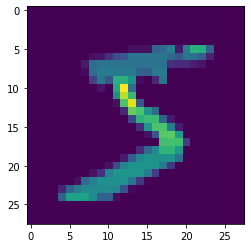

In [12]:
plt.imshow(X_train[0])
plt.show()

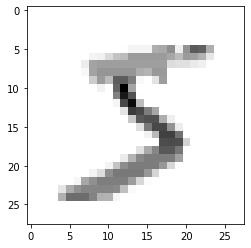

In [13]:
plt.imshow(X_train[0],cmap = plt.cm.binary)
plt.show()

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"]
)

model.fit(X_train,y_train,epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2592 - accuracy: 0.9222
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1073 - accuracy: 0.9672
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0727 - accuracy: 0.9772


In [18]:
val_loss, val_acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1111 - accuracy: 0.9653


In [19]:
print(val_loss, val_acc)

0.1110684797167778 0.9653000235557556


In [20]:
model.save("epic_num_reader.model")

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [21]:
new_model = tf.keras.models.load_model("epic_num_reader.model")

In [22]:
predictions = new_model.predict([X_test])

In [23]:
print(predictions)

[[1.00248183e-08 6.04583420e-07 5.37058077e-06 ... 9.99987960e-01
  2.68435176e-08 5.01679006e-06]
 [5.11692747e-07 2.47780292e-04 9.99742329e-01 ... 2.82493573e-07
  2.67779478e-06 1.09674068e-10]
 [6.82163570e-09 9.99903560e-01 1.48247254e-05 ... 7.47995146e-05
  1.14872375e-06 5.26044666e-08]
 ...
 [5.78337023e-09 1.75945879e-05 1.26111690e-08 ... 9.04240122e-04
  8.64109606e-05 5.33817010e-03]
 [1.17254956e-07 9.44006615e-08 1.22726318e-08 ... 1.09008006e-07
  4.19428725e-05 6.78968263e-07]
 [2.08646702e-06 4.15533101e-08 3.43709667e-06 ... 2.00549954e-09
  2.14036451e-08 1.18638761e-08]]


In [24]:
import numpy as np
np.argmax(predictions[0])

7

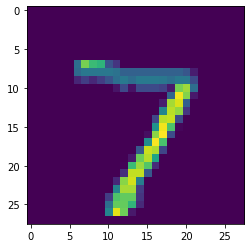

In [25]:
plt.imshow(X_test[0])
plt.show()